# Business Background

We left you in the Intermediate Assignment as a new joiner in an investment platform startup that is currently focused on app-based mutual fund investment. Now assume you already work for the startup for one month, and now it is the end of October 2021 (in your Intermediate Assignment, you were a new joiner in September). You remember at the z of September 2021, the company was starting to offer government bond investment products, in addition to its existing mutual fund products. Existing users in September responded enthusiastically to the communication program you helped devised (in Intermediate Assignment) YEY!

In early 2022, the company will offer another round of government bond investment. Based on the September bond campaign, the company decided to make further investments and run targeted advertising to existing users in October. However, the budget for the campaign is only enough to serve ads to 30% of the total existing users.

Julia now asks you to rank users based on their likelihood or propensity to buy bonds in the next round. Julia also asks you to give her a projection of how profitable the campaign will be for the company. As the data analyst, you're tasked to provide the leads of the top 30% of most prospective users to be targeted. In addition, you will create a simple benefit-cost analysis of the campaign. In this project, you're supported by Bambang, a senior data analyst in your team.

# Libraries

In [100]:
# Data Cleaning - EDA/
import pandas as pd                     #to perform advanced data analysis, import data quickly
import numpy as np                      #to perform arge mahematical operations and statistical operation
import matplotlib.pyplot as plt         # to perform simple interactive visualization
from datetime import datetime           #to perform manipulating dates and times
import seaborn as sns                   #to perform visualization with many color palettes, beatifull style and many statistical plots
from datetime import date
from datetime import timedelta
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn import cluster
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import classification_report, confusion_matrix

# A. PREPARING DATA


## A.1. Users Dataset

In [101]:
users_url = 'https://docs.google.com/spreadsheets/d/1BfrjRXofsaOTeHv_05q0hEMGZwi14l_6Ebu5ydC_Puc/edit#gid=489282015'
users_url_trf = users_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_users = pd.read_csv(users_url_trf)
df_users

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,NaN,Gaji
2,1071649,2021-10-08 1:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,NaN,Gaji
3,3816789,2021-08-12 7:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji
4,3802293,2021-08-15 9:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji
...,...,...,...,...,...,...,...,...
14707,4352347,2021-10-17 15:57:23,Male,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Gaji
14708,4288026,2021-10-15 12:44:05,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,NaN,Lainnya
14709,4286882,2021-10-11 10:06:15,Female,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Dari Suami / istri
14710,4396739,2021-10-21 13:42:20,Male,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Gaji


## A.2. Daily User Balance Oct'21 Dataset

In [102]:
daily_user_balance_url = 'https://docs.google.com/spreadsheets/d/1OSqu1YyWjN8DmEEQy9WFIh4M77aqcJQIpVrN3qOfEGA/edit#gid=1509446299'
daily_user_balance_url_trf = daily_user_balance_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_daily_user_balance = pd.read_csv(daily_user_balance_url_trf)
df_daily_user_balance

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount
0,43195,2021-10-06,285066.0,280000.0,NaN,50008.0,50000.0,NaN,170072.0,170000.0,NaN,NaN,NaN,NaN
1,43195,2021-10-07,285377.0,280000.0,0.0,50012.0,50000.0,0.0,170200.0,170000.0,0.0,NaN,NaN,NaN
2,43195,2021-10-08,288188.0,280000.0,0.0,50016.0,50000.0,0.0,169983.0,170000.0,0.0,NaN,NaN,NaN
3,43195,2021-10-11,285988.0,280000.0,0.0,50028.0,50000.0,0.0,169866.0,170000.0,0.0,NaN,NaN,NaN
4,43195,2021-10-12,285988.0,280000.0,0.0,50032.0,50000.0,0.0,169857.0,170000.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401234,4457509,2021-10-29,NaN,NaN,NaN,10001.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401235,4457532,2021-10-29,NaN,NaN,NaN,10001.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401236,4457596,2021-10-29,NaN,NaN,NaN,10001.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401237,4457622,2021-10-29,NaN,NaN,NaN,10001.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## A.3. Govt Bond Result Sep'21 Dataset

In [103]:
bond_url = 'https://docs.google.com/spreadsheets/d/1aUGP2mm2_b9uwBILHnDbGa5evLC1y9yqdNK9EUYiXOs/edit#gid=1254201307'
bond_url_trf = bond_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_bond_sept = pd.read_csv(bond_url_trf)
df_bond_sept

,user_id,flag_order_bond,bond_units_ordered
0,50701,1,34
1,50961,1,99
2,51883,0,0
3,53759,0,0
4,54759,1,92
...,...,...,...
8479,4173878,0,0
8480,4174045,0,0
8481,4174169,0,0
8482,4174486,0,0


# B. DATA PERPARATION FOR FURTHER ANALYSIS

## User vintage per 30 sept and 29 oct
(Vintage is number of months since user opened an account with us)

In [104]:
df_users['registration_import_datetime'] = pd.to_datetime(df_users['registration_import_datetime'])
df_users['registration_import_datetime'] = df_users['registration_import_datetime'].dt.strftime('%Y-%m-%d')
df_users

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source
0,162882,2021-09-17,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji
1,3485491,2021-10-09,Female,55,Others,> Rp 50 Juta - 100 Juta,NaN,Gaji
2,1071649,2021-10-08,Male,50,Swasta,Rp 10 Juta - 50 Juta,NaN,Gaji
3,3816789,2021-08-12,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji
4,3802293,2021-08-15,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji
...,...,...,...,...,...,...,...,...
14707,4352347,2021-10-17,Male,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Gaji
14708,4288026,2021-10-15,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,NaN,Lainnya
14709,4286882,2021-10-11,Female,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Dari Suami / istri
14710,4396739,2021-10-21,Male,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Gaji


In [105]:
# filter to only show users who registered before 30 sept 2021
df_users = df_users[df_users['registration_import_datetime'] <= '2021-09-30']

df_users

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source
0,162882,2021-09-17,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji
3,3816789,2021-08-12,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji
4,3802293,2021-08-15,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji
5,3049927,2021-08-29,Male,53,Swasta,< 10 Juta,NaN,Gaji
6,1407611,2021-09-23,Male,56,Swasta,> Rp 100 Juta - 500 Juta,NaN,Keuntungan Bisnis
...,...,...,...,...,...,...,...,...
14692,3773859,2021-08-06,Male,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Lainnya
14693,3798265,2021-08-09,Female,49,IRT,Rp 10 Juta - 50 Juta,used referral,Keuntungan Bisnis
14694,3670811,2021-08-02,Male,49,Swasta,> Rp 50 Juta - 100 Juta,NaN,Gaji
14695,3812221,2021-08-11,Male,49,PNS,> Rp 100 Juta - 500 Juta,NaN,Gaji


In [106]:
# Calculate User Vintage
#  (#months since user opened an account with us)
# create separate between 30 sept 2021 & 29 October 2021
df_users['vintage_sep'] = datetime.strptime('2021-09-30', '%Y-%m-%d') - pd.to_datetime(df_users['registration_import_datetime'])
df_users['vintage_oct'] = datetime.strptime('2021-10-29', '%Y-%m-%d') - pd.to_datetime(df_users['registration_import_datetime'])

# Convert time deltas to integers(number of days)
df_users['vintage_sep'] = df_users['vintage_sep'].dt.days
df_users['vintage_oct'] = df_users['vintage_oct'].dt.days

# df_users.dtypes
df_users

C:\Users\Pandu\AppData\Local\Temp\ipykernel_4840\3727372922.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_users['vintage_sep'] = datetime.strptime('2021-09-30', '%Y-%m-%d') - pd.to_datetime(df_users['registration_import_datetime'])
C:\Users\Pandu\AppData\Local\Temp\ipykernel_4840\3727372922.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_users['vintage_oct'] = datetime.strptime('2021-10-29', '%Y-%m-%d') - pd.to_datetime(df_users['registration_import_datetime'])
C:\Users\Pandu\AppData\Local\T

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,vintage_sep,vintage_oct
0,162882,2021-09-17,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji,13,42
3,3816789,2021-08-12,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji,49,78
4,3802293,2021-08-15,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,46,75
5,3049927,2021-08-29,Male,53,Swasta,< 10 Juta,NaN,Gaji,32,61
6,1407611,2021-09-23,Male,56,Swasta,> Rp 100 Juta - 500 Juta,NaN,Keuntungan Bisnis,7,36
...,...,...,...,...,...,...,...,...,...,...
14692,3773859,2021-08-06,Male,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Lainnya,55,84
14693,3798265,2021-08-09,Female,49,IRT,Rp 10 Juta - 50 Juta,used referral,Keuntungan Bisnis,52,81
14694,3670811,2021-08-02,Male,49,Swasta,> Rp 50 Juta - 100 Juta,NaN,Gaji,59,88
14695,3812221,2021-08-11,Male,49,PNS,> Rp 100 Juta - 500 Juta,NaN,Gaji,50,79


## Merge government bond data with users data

In [107]:
# df_users
# df_bond_sept
# print(type(df_users))

df_bond_sep_users = df_users.merge(df_bond_sept, how='inner', left_on='user_id', right_on='user_id')
df_bond_sep_users

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,vintage_sep,vintage_oct,flag_order_bond,bond_units_ordered
0,3816789,2021-08-12,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji,49,78,0,0
1,3802293,2021-08-15,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,46,75,0,0
2,3049927,2021-08-29,Male,53,Swasta,< 10 Juta,NaN,Gaji,32,61,0,0
3,3836491,2021-08-18,Male,59,Others,< 10 Juta,used referral,Lainnya,43,72,0,0
4,3783302,2021-09-14,Male,57,Swasta,> Rp 50 Juta - 100 Juta,NaN,Gaji,16,45,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8479,3773859,2021-08-06,Male,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Lainnya,55,84,0,0
8480,3798265,2021-08-09,Female,49,IRT,Rp 10 Juta - 50 Juta,used referral,Keuntungan Bisnis,52,81,0,0
8481,3670811,2021-08-02,Male,49,Swasta,> Rp 50 Juta - 100 Juta,NaN,Gaji,59,88,1,18
8482,3812221,2021-08-11,Male,49,PNS,> Rp 100 Juta - 500 Juta,NaN,Gaji,50,79,0,0


## End of Period for September 2021 & October 2021

In [108]:
# Copying data
df_eop_sep = df_daily_user_balance.copy()
df_eop_oct = df_daily_user_balance.copy()

# Condition for end of september and october 21 period
eop_sep_21 = df_eop_sep['date'] == '2021-09-30'
eop_oct_21 = df_eop_oct['date'] == '2021-10-29'

End of Period September 2021

In [109]:
# Only select AUMs and invested amount from the last date (exactly at 2021-09-30)
df_eop_sep = df_eop_sep[eop_sep_21]

# exclude transaction amount
trans_cols = ['Saham_transaction_amount', 'Pasar_Uang_transaction_amount', 'Pendapatan_Tetap_transaction_amount', 'Campuran_transaction_amount']
df_eop_sep = df_eop_sep[df_eop_sep.columns[~df_eop_sep.columns.isin(trans_cols)]]

# Create profit percentage for each index of fund
df_eop_sep['Saham_profit_percentage'] = (((df_eop_sep['Saham_AUM'] - df_eop_sep['Saham_invested_amount']))/df_eop_sep['Saham_invested_amount'])*100
df_eop_sep['Pasar_Uang_profit_percentage'] = (((df_eop_sep['Pasar_Uang_AUM'] - df_eop_sep['Pasar_Uang_invested_amount']))/df_eop_sep['Pasar_Uang_invested_amount'])*100
df_eop_sep['Pendapatan_Tetap_profit_percentage'] = (((df_eop_sep['Pendapatan_Tetap_AUM'] - df_eop_sep['Pendapatan_Tetap_invested_amount']))/df_eop_sep['Pendapatan_Tetap_invested_amount'])*100
df_eop_sep['Campuran_profit_percentage'] = (((df_eop_sep['Campuran_AUM'] - df_eop_sep['Campuran_invested_amount']))/df_eop_sep['Campuran_invested_amount'])*100

# Fill the remaining null with 0
df_eop_sep = df_eop_sep.fillna(0)

# Reorder columns
df_eop_sep = df_eop_sep.iloc[:, [0,1,2,3,10,4,5,11,6,7,12,8,9,13]]

df_eop_sep

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_profit_percentage,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_profit_percentage,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_profit_percentage,Campuran_AUM,Campuran_invested_amount,Campuran_profit_percentage
58,50701,2021-09-30,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,9943587.0,10000000.0,-0.56413
102,50961,2021-09-30,2063909.0,2000000.0,3.195450,700603.0,700000.0,0.086143,1398998.0,1400000.0,-0.071571,0.0,0.0,0.00000
172,53759,2021-09-30,73179.0,70000.0,4.541429,10027.0,10000.0,0.270000,20109.0,20000.0,0.545000,0.0,0.0,0.00000
218,54759,2021-09-30,0.0,0.0,0.000000,12049049.0,12000000.0,0.408742,0.0,0.0,0.000000,0.0,0.0,0.00000
276,61414,2021-09-30,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354826,4165020,2021-09-30,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000
354885,4165132,2021-09-30,0.0,0.0,0.000000,10001.0,10000.0,0.010000,0.0,0.0,0.000000,0.0,0.0,0.00000
355081,4165630,2021-09-30,41625.0,40000.0,4.062500,10001.0,10000.0,0.010000,49869.0,50000.0,-0.262000,0.0,0.0,0.00000
355121,4165704,2021-09-30,0.0,0.0,0.000000,0.0,0.0,0.000000,9987.0,10000.0,-0.130000,0.0,0.0,0.00000


End of Period October 2021

In [110]:
# Only select AUMs and invested amount from the last date (exactly at 2021-10-29)
df_eop_oct = df_eop_oct[eop_oct_21]

# exclude transaction amount
trans_cols = ['Saham_transaction_amount', 'Pasar_Uang_transaction_amount', 'Pendapatan_Tetap_transaction_amount', 'Campuran_transaction_amount']
df_eop_oct = df_eop_oct[df_eop_oct.columns[~df_eop_oct.columns.isin(trans_cols)]]

# Create profit percentage for each index of fund
df_eop_oct['Saham_profit_percentage'] = (((df_eop_oct['Saham_AUM'] - df_eop_oct['Saham_invested_amount']))/df_eop_oct['Saham_invested_amount'])*100
df_eop_oct['Pasar_Uang_profit_percentage'] = (((df_eop_oct['Pasar_Uang_AUM'] - df_eop_oct['Pasar_Uang_invested_amount']))/df_eop_oct['Pasar_Uang_invested_amount'])*100
df_eop_oct['Pendapatan_Tetap_profit_percentage'] = (((df_eop_oct['Pendapatan_Tetap_AUM'] - df_eop_oct['Pendapatan_Tetap_invested_amount']))/df_eop_oct['Pendapatan_Tetap_invested_amount'])*100
df_eop_oct['Campuran_profit_percentage'] = (((df_eop_oct['Campuran_AUM'] - df_eop_oct['Campuran_invested_amount']))/df_eop_oct['Campuran_invested_amount'])*100

# Fill the remaining null with 0
df_eop_oct = df_eop_oct.fillna(0)

# Reorder columns
df_eop_oct = df_eop_oct.iloc[:, [0,1,2,3,10,4,5,11,6,7,12,8,9,13]]

df_eop_oct

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_profit_percentage,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_profit_percentage,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_profit_percentage,Campuran_AUM,Campuran_invested_amount,Campuran_profit_percentage
17,43195,2021-10-29,280945.0,280000.0,0.337500,50127.0,50000.0,0.254000,170702.0,170000.0,0.412941,0.0,0.0,0.00000
34,47757,2021-10-29,581030.0,600000.0,-3.161667,0.0,0.0,0.000000,9033958.0,9000000.0,0.377311,0.0,0.0,0.00000
79,50701,2021-10-29,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,9637035.0,10000000.0,-3.62965
123,50961,2021-10-29,7632462.0,7110318.0,7.343469,703336.0,700000.0,0.476571,1405335.0,1400000.0,0.381071,969171.0,1000000.0,-3.08290
144,51883,2021-10-29,96927.0,90000.0,7.696667,20036.0,20000.0,0.180000,90331.0,90000.0,0.367778,0.0,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401234,4457509,2021-10-29,0.0,0.0,0.000000,10001.0,10000.0,0.010000,0.0,0.0,0.000000,0.0,0.0,0.00000
401235,4457532,2021-10-29,0.0,0.0,0.000000,10001.0,10000.0,0.010000,0.0,0.0,0.000000,0.0,0.0,0.00000
401236,4457596,2021-10-29,0.0,0.0,0.000000,10001.0,10000.0,0.010000,0.0,0.0,0.000000,0.0,0.0,0.00000
401237,4457622,2021-10-29,0.0,0.0,0.000000,10001.0,10000.0,0.010000,0.0,0.0,0.000000,0.0,0.0,0.00000


## EDA

Text(0, 0.5, 'quantity')

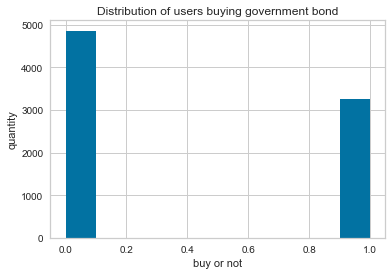

In [185]:
df_bond_sep_users['flag_order_bond'].hist()
plt.title('Distribution of users buying government bond')
plt.xlabel('buy or not')
plt.ylabel('quantity')

Buy and not buy distribution is fairly balanced even though there are less people buying the govt. bond in the previous round

Text(0, 0.5, 'quantity')

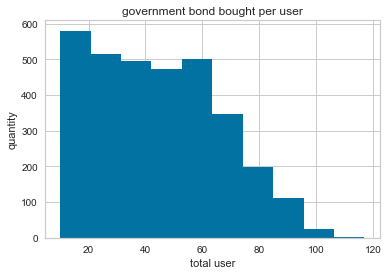

In [183]:
x = df_bond_sep_users['bond_units_ordered'][df_bond_sep_users['flag_order_bond']!=0]

x.hist()
plt.title('government bond bought per user')
plt.xlabel('total user')
plt.ylabel('quantity')

from the graph above, we know that the data is fairly balanced.  
Most people bought government bonds bought in between 1-20 bond,    
but there are also fair amount of distribution of people who bought the bond between 20-60. 

Text(0, 0.5, 'quantity')

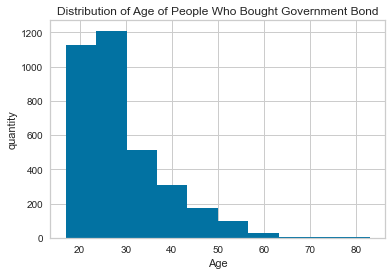

In [112]:
x = df_bond_sep_users['user_age'][df_bond_sep_users['flag_order_bond']!=0]

x.hist()
plt.title('Distribution of Age of People Who Bought Government Bond')
plt.xlabel('Age')
plt.ylabel('quantity')

Most people who bought government bonds aged between 20-25 years old.

# C. DATA CLEANING 


## C.1. Handle Missing Value

### Users (merged with bond data previously)

In [113]:
df_bond_sep_users.isna().sum()

user_id                            0
registration_import_datetime       0
user_gender                        0
user_age                           0
user_occupation                    0
user_income_range                  0
referral_code_used              5455
user_income_source                 0
vintage_sep                        0
vintage_oct                        0
flag_order_bond                    0
bond_units_ordered                 0
dtype: int64

In [114]:
# Fill null data in 'referral_code_used' data with "no"
df_bond_sep_users['referral_code_used'].fillna('no', inplace=True)
df_bond_sep_users[['referral_code_used']]

,referral_code_used
0,no
1,used referral
2,no
3,used referral
4,no
...,...
8479,no
8480,used referral
8481,no
8482,no


I choose to fill every null in referral_code_used to make it easier to read and later can be use

### End of Period September 2021

In [115]:
eop_sep_21.isna().sum()

0

### End of Period October 2021

In [116]:
eop_oct_21.isna().sum()

0

## C.2. Drop Irrelevant Value

### Users data

I choose to drop registration date and income source because it is currently irrelevant for the analysis 

In [117]:
# Save the dropped columns
drop_cols = ['registration_import_datetime', 'user_income_source']
df_bond_sep_users.drop(drop_cols, inplace=True, axis=1)
df_bond_sep_users

,user_id,user_gender,user_age,user_occupation,user_income_range,referral_code_used,vintage_sep,vintage_oct,flag_order_bond,bond_units_ordered
0,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,no,49,78,0,0
1,3802293,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,46,75,0,0
2,3049927,Male,53,Swasta,< 10 Juta,no,32,61,0,0
3,3836491,Male,59,Others,< 10 Juta,used referral,43,72,0,0
4,3783302,Male,57,Swasta,> Rp 50 Juta - 100 Juta,no,16,45,0,0
...,...,...,...,...,...,...,...,...,...,...
8479,3773859,Male,49,Swasta,> Rp 100 Juta - 500 Juta,no,55,84,0,0
8480,3798265,Female,49,IRT,Rp 10 Juta - 50 Juta,used referral,52,81,0,0
8481,3670811,Male,49,Swasta,> Rp 50 Juta - 100 Juta,no,59,88,1,18
8482,3812221,Male,49,PNS,> Rp 100 Juta - 500 Juta,no,50,79,0,0


### End of Period data

I choose to leave the data as it is because all values in End of Period data are relevant for analysis

## C.3. Checking Duplicates

In [118]:
df_bond_sep_users.duplicated().sum()

0

In [119]:
df_eop_sep.duplicated().sum()

0

In [120]:
df_eop_oct.duplicated().sum()

0

## C.4. Check Data Types

### Users data

In [121]:
df_bond_sep_users.dtypes

user_id                int64
user_gender           object
user_age               int64
user_occupation       object
user_income_range     object
referral_code_used    object
vintage_sep            int64
vintage_oct            int64
flag_order_bond        int64
bond_units_ordered     int64
dtype: object

In [122]:
# Because user_id is a unique identifier and not just a normal value number, we need to convert it to object
df_bond_sep_users['user_id'] = df_bond_sep_users['user_id'].astype(str)
df_bond_sep_users.dtypes

user_id               object
user_gender           object
user_age               int64
user_occupation       object
user_income_range     object
referral_code_used    object
vintage_sep            int64
vintage_oct            int64
flag_order_bond        int64
bond_units_ordered     int64
dtype: object

### End of Period data

In [123]:
df_eop_sep.dtypes

user_id                                 int64
date                                   object
Saham_AUM                             float64
Saham_invested_amount                 float64
Saham_profit_percentage               float64
Pasar_Uang_AUM                        float64
Pasar_Uang_invested_amount            float64
Pasar_Uang_profit_percentage          float64
Pendapatan_Tetap_AUM                  float64
Pendapatan_Tetap_invested_amount      float64
Pendapatan_Tetap_profit_percentage    float64
Campuran_AUM                          float64
Campuran_invested_amount              float64
Campuran_profit_percentage            float64
dtype: object

In [124]:
df_eop_oct.dtypes

user_id                                 int64
date                                   object
Saham_AUM                             float64
Saham_invested_amount                 float64
Saham_profit_percentage               float64
Pasar_Uang_AUM                        float64
Pasar_Uang_invested_amount            float64
Pasar_Uang_profit_percentage          float64
Pendapatan_Tetap_AUM                  float64
Pendapatan_Tetap_invested_amount      float64
Pendapatan_Tetap_profit_percentage    float64
Campuran_AUM                          float64
Campuran_invested_amount              float64
Campuran_profit_percentage            float64
dtype: object

In [125]:
# Because user_id is a unique identifier and not just a normal value number, we need to convert it to object
df_eop_sep['user_id'] = df_eop_sep['user_id'].astype(str)
df_eop_sep.dtypes

user_id                                object
date                                   object
Saham_AUM                             float64
Saham_invested_amount                 float64
Saham_profit_percentage               float64
Pasar_Uang_AUM                        float64
Pasar_Uang_invested_amount            float64
Pasar_Uang_profit_percentage          float64
Pendapatan_Tetap_AUM                  float64
Pendapatan_Tetap_invested_amount      float64
Pendapatan_Tetap_profit_percentage    float64
Campuran_AUM                          float64
Campuran_invested_amount              float64
Campuran_profit_percentage            float64
dtype: object

In [126]:
# Because user_id is a unique identifier and not just a normal value number, we need to convert it to object
df_eop_oct['user_id'] = df_eop_oct['user_id'].astype(str)
df_eop_oct.dtypes

user_id                                object
date                                   object
Saham_AUM                             float64
Saham_invested_amount                 float64
Saham_profit_percentage               float64
Pasar_Uang_AUM                        float64
Pasar_Uang_invested_amount            float64
Pasar_Uang_profit_percentage          float64
Pendapatan_Tetap_AUM                  float64
Pendapatan_Tetap_invested_amount      float64
Pendapatan_Tetap_profit_percentage    float64
Campuran_AUM                          float64
Campuran_invested_amount              float64
Campuran_profit_percentage            float64
dtype: object

## C.5. Simplifying Categorical Data

In [127]:
df_bond_sep_users
df_bond_sep_users.loc[df_bond_sep_users['user_income_range'] == '> Rp 100 Juta - 500 Juta',  'user_income_range'] = '> Rp 100 Juta'
df_bond_sep_users.loc[df_bond_sep_users['user_income_range'] == '> Rp 500 Juta - 1 Miliar',  'user_income_range'] = '> Rp 100 Juta'
df_bond_sep_users.loc[df_bond_sep_users['user_income_range'] == '> Rp 1 Miliar',  'user_income_range'] = '> Rp 100 Juta'

df_bond_sep_users

,user_id,user_gender,user_age,user_occupation,user_income_range,referral_code_used,vintage_sep,vintage_oct,flag_order_bond,bond_units_ordered
0,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,no,49,78,0,0
1,3802293,Female,47,PNS,> Rp 100 Juta,used referral,46,75,0,0
2,3049927,Male,53,Swasta,< 10 Juta,no,32,61,0,0
3,3836491,Male,59,Others,< 10 Juta,used referral,43,72,0,0
4,3783302,Male,57,Swasta,> Rp 50 Juta - 100 Juta,no,16,45,0,0
...,...,...,...,...,...,...,...,...,...,...
8479,3773859,Male,49,Swasta,> Rp 100 Juta,no,55,84,0,0
8480,3798265,Female,49,IRT,Rp 10 Juta - 50 Juta,used referral,52,81,0,0
8481,3670811,Male,49,Swasta,> Rp 50 Juta - 100 Juta,no,59,88,1,18
8482,3812221,Male,49,PNS,> Rp 100 Juta,no,50,79,0,0


I choose to simplifying client with income more than 100 Juta Rupiah for easier clasification as they are enough to be called "Rich"

## C.6. String Manipulation

### Manipulate string for referal code used

In [128]:
df_bond_sep_users['referral_code_used'] = df_bond_sep_users['referral_code_used'].replace('used referral', 'yes')

df_bond_sep_users['referral_code_used'].value_counts()

no     5455
yes    3029
Name: referral_code_used, dtype: int64

## C.7. Outlier Analysis 

### Users data

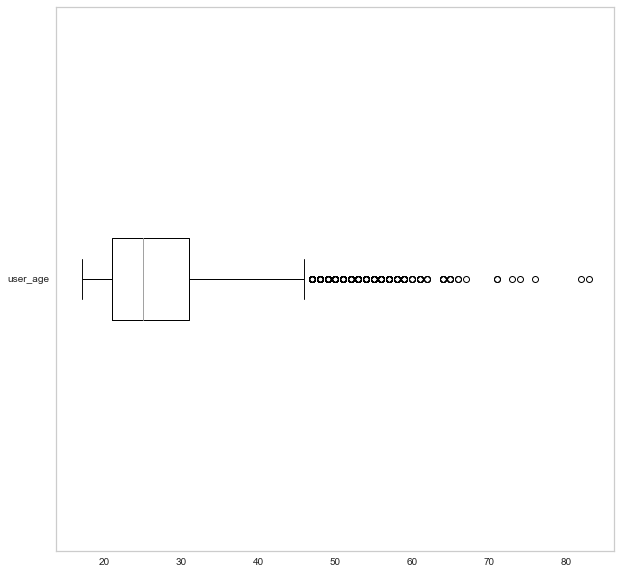

In [129]:
# df_bond_sep_users
df_bond_sep_users.boxplot(column=['user_age'],fontsize=10,
           rot=0,grid=False,figsize=(10,10),vert=False)
plt.show()

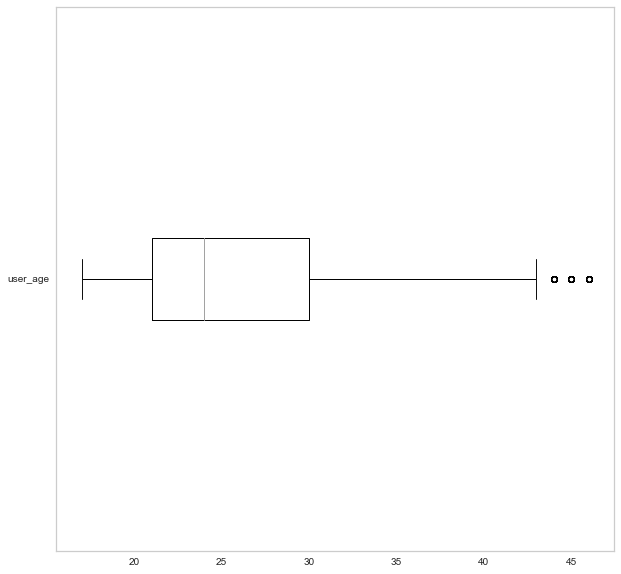

In [130]:
# Remove remove data's outlier with upper fence, since outliers only present above upper fence
Q1 = df_bond_sep_users['user_age'].quantile(0.25)
Q3 = df_bond_sep_users['user_age'].quantile(0.75)

IQR = Q3 - Q1
upper_fence = Q3 + (1.5 * IQR)

df_bond_sep_users = df_bond_sep_users[~(df_bond_sep_users['user_age'] > upper_fence)]

df_bond_sep_users.boxplot(column=['user_age'],fontsize=10,
           rot=0,grid=False,figsize=(10,10),vert=False)
plt.show()

### End of Period September data

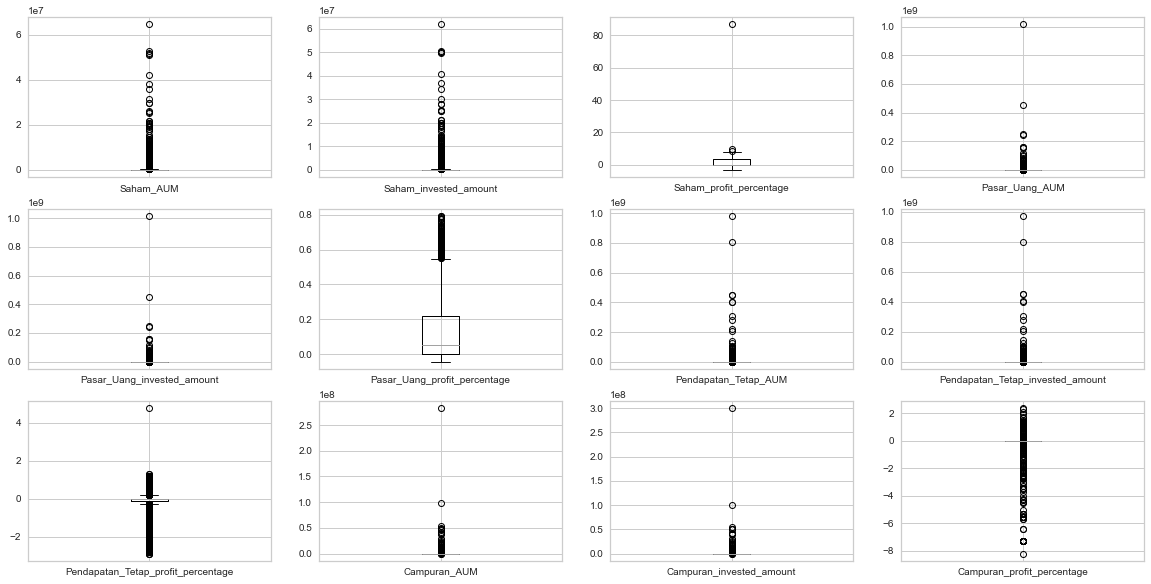

In [131]:
# Take all bond values
categories = df_eop_sep.columns[2:]

fig, axes = plt.subplots(nrows=3, ncols=4,figsize=(20,10))
for i,el in enumerate(categories):
    a = df_eop_sep.boxplot(el, ax=axes.flatten()[i],grid=True)
plt.show()

Before removing outliers using IQR formula, reminder that the value **0** means no transaction. I need to exclude data with 0 values while calculating by replacing with NaN value

In [132]:
df_eop_sep = df_eop_sep.replace(0, np.NaN, regex=True)

In [133]:
df_eop_sep.shape

(8277, 14)

In [134]:
#remove outliers using 1 percentile up and down
for i in categories:
    boxplot_min = df_eop_sep[i].quantile(0.01)
    boxplot_max = df_eop_sep[i].quantile(0.99)

    filter_price_min = df_eop_sep[i]<boxplot_min
    filter_price_max = df_eop_sep[i]>boxplot_max

    df_eop_sep = df_eop_sep[~
    (filter_price_min | filter_price_max)
    ]

In [135]:
df_eop_sep.shape

(7712, 14)

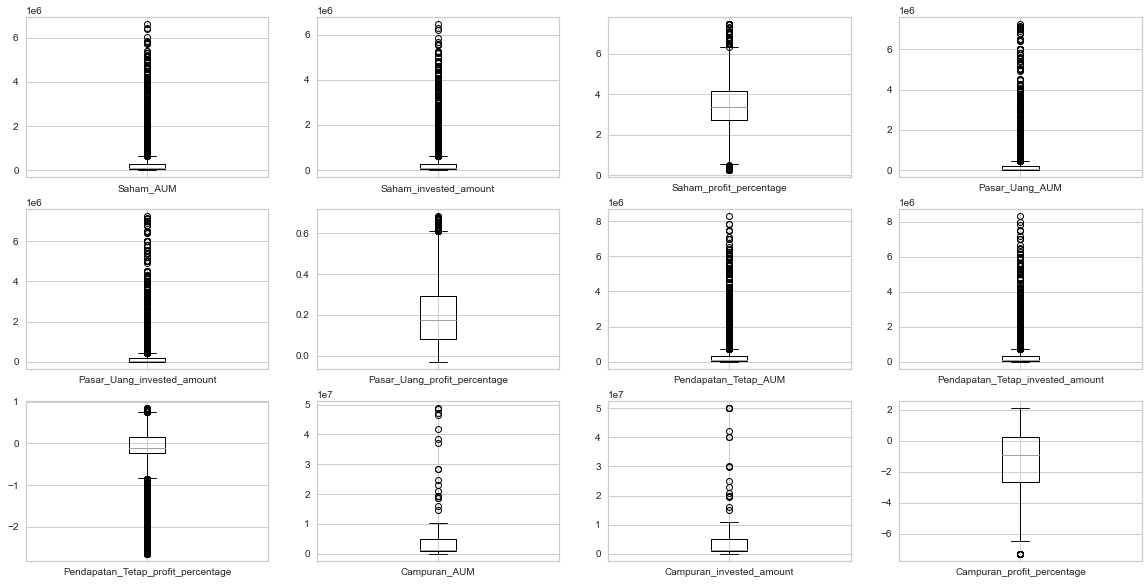

In [136]:
fig, axes = plt.subplots(nrows=3, ncols=4,figsize=(20,10))
for i,el in enumerate(categories):
    a = df_eop_sep.boxplot(el, ax=axes.flatten()[i],grid=True)
plt.show()

In [137]:
# fill NaN value back to 0
df_eop_sep.fillna(0,inplace=True)
df_eop_sep

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_profit_percentage,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_profit_percentage,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_profit_percentage,Campuran_AUM,Campuran_invested_amount,Campuran_profit_percentage
58,50701,2021-09-30,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,9943587.0,10000000.0,-0.56413
102,50961,2021-09-30,2063909.0,2000000.0,3.195450,700603.0,700000.0,0.086143,1398998.0,1400000.0,-0.071571,0.0,0.0,0.00000
172,53759,2021-09-30,73179.0,70000.0,4.541429,10027.0,10000.0,0.270000,20109.0,20000.0,0.545000,0.0,0.0,0.00000
276,61414,2021-09-30,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000
360,66145,2021-09-30,249327.0,240000.0,3.886250,29992.0,30000.0,-0.026667,129748.0,130000.0,-0.193846,0.0,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354826,4165020,2021-09-30,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000
354885,4165132,2021-09-30,0.0,0.0,0.000000,10001.0,10000.0,0.010000,0.0,0.0,0.000000,0.0,0.0,0.00000
355081,4165630,2021-09-30,41625.0,40000.0,4.062500,10001.0,10000.0,0.010000,49869.0,50000.0,-0.262000,0.0,0.0,0.00000
355121,4165704,2021-09-30,0.0,0.0,0.000000,0.0,0.0,0.000000,9987.0,10000.0,-0.130000,0.0,0.0,0.00000


In [138]:

round(((8277-7712) / 8277*100), 2)

6.83

Percentage for Outliers removed = (8277-7712) / 8277*100 = 6,83%

**6.83% of outliers are removed**

### End of Period October data

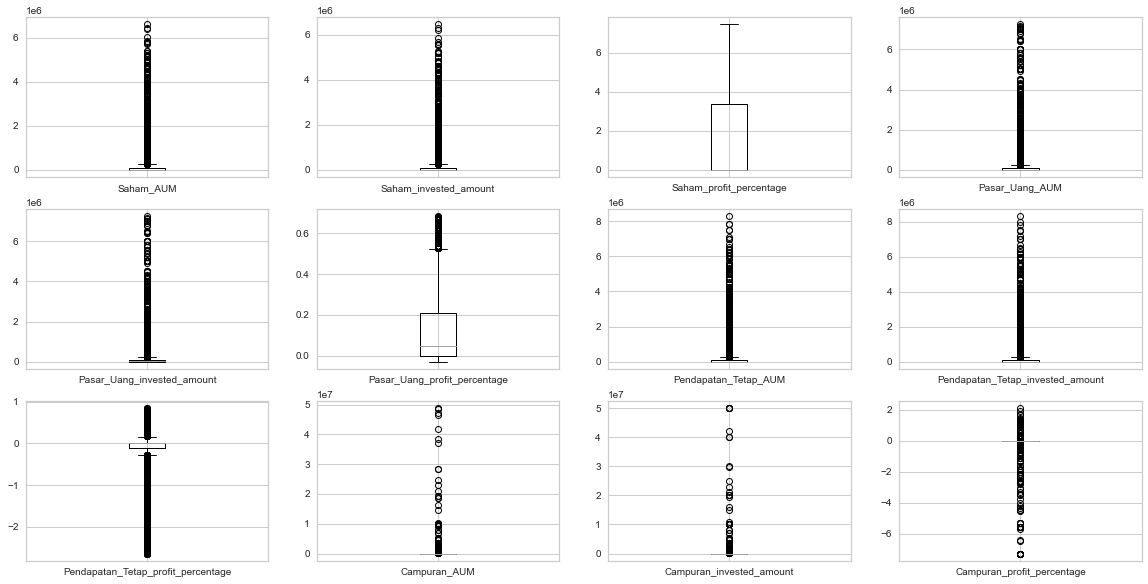

In [139]:
# Take all bond values
categories = df_eop_oct.columns[2:]

fig, axes = plt.subplots(nrows=3, ncols=4,figsize=(20,10))
for i,el in enumerate(categories):
    a = df_eop_sep.boxplot(el, ax=axes.flatten()[i],grid=True)
plt.show()

Before removing outliers using IQR formula, reminder that the value **0** means no transaction. I need to exclude data with 0 values while calculating by replacing with NaN value

In [140]:
df_eop_oct = df_eop_oct.replace(0, np.NaN, regex=True)

In [141]:
df_eop_oct.shape

(14712, 14)

In [142]:
#remove outliers using 1 percentile up and down
for i in categories:
    boxplot_min = df_eop_oct[i].quantile(0.01)
    boxplot_max = df_eop_oct[i].quantile(0.99)

    filter_price_min = df_eop_oct[i]<boxplot_min
    filter_price_max = df_eop_oct[i]>boxplot_max

    df_eop_oct = df_eop_oct[~
    (filter_price_min | filter_price_max)
    ]

In [143]:
df_eop_oct.shape

(13734, 14)

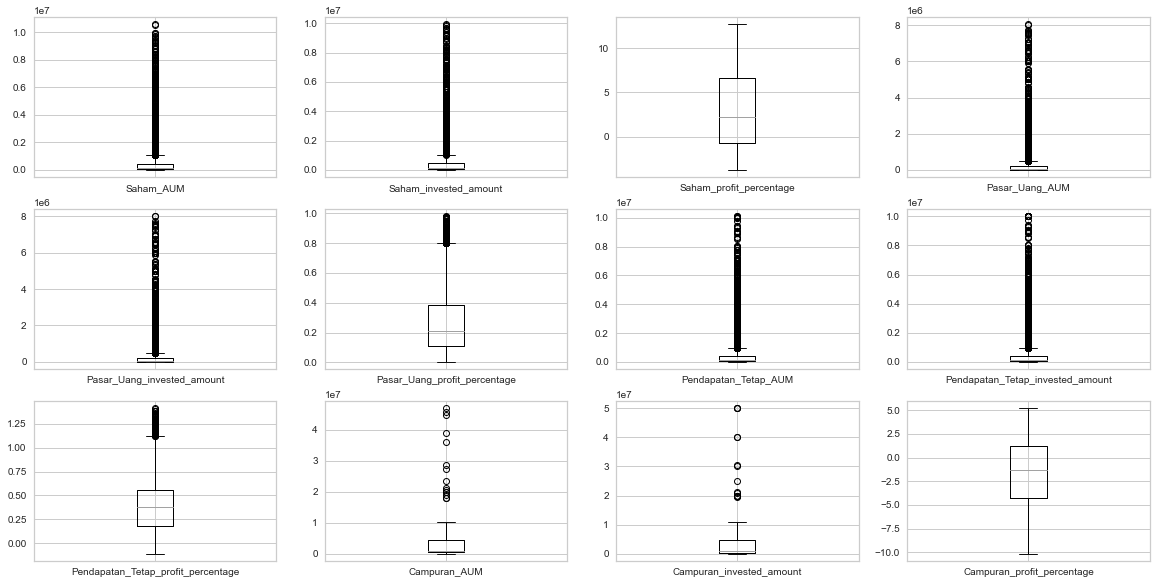

In [144]:
fig, axes = plt.subplots(nrows=3, ncols=4,figsize=(20,10))
for i,el in enumerate(categories):
    a = df_eop_oct.boxplot(el, ax=axes.flatten()[i],grid=True)
plt.show()

In [145]:
# fill NaN value back to 0
df_eop_oct.fillna(0,inplace=True)
df_eop_oct

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_profit_percentage,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_profit_percentage,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_profit_percentage,Campuran_AUM,Campuran_invested_amount,Campuran_profit_percentage
17,43195,2021-10-29,280945.0,280000.0,0.337500,50127.0,50000.0,0.254000,170702.0,170000.0,0.412941,0.0,0.0,0.00000
34,47757,2021-10-29,581030.0,600000.0,-3.161667,0.0,0.0,0.000000,9033958.0,9000000.0,0.377311,0.0,0.0,0.00000
79,50701,2021-10-29,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,9637035.0,10000000.0,-3.62965
123,50961,2021-10-29,7632462.0,7110318.0,7.343469,703336.0,700000.0,0.476571,1405335.0,1400000.0,0.381071,969171.0,1000000.0,-3.08290
144,51883,2021-10-29,96927.0,90000.0,7.696667,20036.0,20000.0,0.180000,90331.0,90000.0,0.367778,0.0,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401233,4457305,2021-10-29,49784.0,50000.0,-0.432000,10001.0,10000.0,0.010000,39974.0,40000.0,-0.065000,0.0,0.0,0.00000
401234,4457509,2021-10-29,0.0,0.0,0.000000,10001.0,10000.0,0.010000,0.0,0.0,0.000000,0.0,0.0,0.00000
401235,4457532,2021-10-29,0.0,0.0,0.000000,10001.0,10000.0,0.010000,0.0,0.0,0.000000,0.0,0.0,0.00000
401236,4457596,2021-10-29,0.0,0.0,0.000000,10001.0,10000.0,0.010000,0.0,0.0,0.000000,0.0,0.0,0.00000


In [146]:

round(((14712-13734) / 14712*100), 2)

6.65

Percentage for Outliers removed = (14712-13734) / 14712*100 = 6,65%

**6.65% of outliers are removed**

# D. Prepare data to fit to the logistic regression model

## Create two separate tables

For each october and september

In [147]:
df_clean_sep = df_eop_sep.copy()
df_clean_sep = df_clean_sep.merge(df_bond_sep_users, how='inner', 
                                  left_on='user_id', right_on='user_id')
df_clean_sep

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_profit_percentage,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_profit_percentage,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,...,Campuran_profit_percentage,user_gender,user_age,user_occupation,user_income_range,referral_code_used,vintage_sep,vintage_oct,flag_order_bond,bond_units_ordered
0,50701,2021-09-30,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,-0.56413,Female,28,IRT,Rp 10 Juta - 50 Juta,no,37,66,1,34
1,50961,2021-09-30,2063909.0,2000000.0,3.195450,700603.0,700000.0,0.086143,1398998.0,1400000.0,...,0.00000,Female,33,Swasta,> Rp 100 Juta,no,41,70,1,99
2,53759,2021-09-30,73179.0,70000.0,4.541429,10027.0,10000.0,0.270000,20109.0,20000.0,...,0.00000,Male,29,Swasta,< 10 Juta,no,42,71,0,0
3,61414,2021-09-30,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.00000,Male,26,Pelajar,< 10 Juta,no,53,82,0,0
4,66145,2021-09-30,249327.0,240000.0,3.886250,29992.0,30000.0,-0.026667,129748.0,130000.0,...,0.00000,Female,33,Swasta,> Rp 100 Juta,no,28,57,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7396,4165020,2021-09-30,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.00000,Male,24,Others,< 10 Juta,yes,2,31,0,0
7397,4165132,2021-09-30,0.0,0.0,0.000000,10001.0,10000.0,0.010000,0.0,0.0,...,0.00000,Male,18,Pelajar,< 10 Juta,yes,2,31,0,0
7398,4165630,2021-09-30,41625.0,40000.0,4.062500,10001.0,10000.0,0.010000,49869.0,50000.0,...,0.00000,Female,28,Swasta,Rp 10 Juta - 50 Juta,no,2,31,1,55
7399,4165704,2021-09-30,0.0,0.0,0.000000,0.0,0.0,0.000000,9987.0,10000.0,...,0.00000,Male,25,Swasta,Rp 10 Juta - 50 Juta,yes,2,31,0,0


In [148]:
df_clean_oct = df_eop_oct.copy()
df_clean_oct = df_clean_oct.merge(df_bond_sep_users, how='inner', 
                                  left_on='user_id', right_on='user_id')
df_clean_oct

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_profit_percentage,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_profit_percentage,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,...,Campuran_profit_percentage,user_gender,user_age,user_occupation,user_income_range,referral_code_used,vintage_sep,vintage_oct,flag_order_bond,bond_units_ordered
0,50701,2021-10-29,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,-3.62965,Female,28,IRT,Rp 10 Juta - 50 Juta,no,37,66,1,34
1,50961,2021-10-29,7632462.0,7110318.0,7.343469,703336.0,700000.0,0.476571,1405335.0,1400000.0,...,-3.08290,Female,33,Swasta,> Rp 100 Juta,no,41,70,1,99
2,51883,2021-10-29,96927.0,90000.0,7.696667,20036.0,20000.0,0.180000,90331.0,90000.0,...,0.00000,Male,27,Pelajar,> Rp 50 Juta - 100 Juta,no,1,30,0,0
3,53759,2021-10-29,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.00000,Male,29,Swasta,< 10 Juta,no,42,71,0,0
4,61414,2021-10-29,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.00000,Male,26,Pelajar,< 10 Juta,no,53,82,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7558,4173878,2021-10-29,94123.0,90000.0,4.581111,20032.0,20000.0,0.160000,90285.0,90000.0,...,0.00000,Female,35,Swasta,Rp 10 Juta - 50 Juta,no,1,30,0,0
7559,4174045,2021-10-29,0.0,0.0,0.000000,100402.0,100000.0,0.402000,0.0,0.0,...,0.00000,Female,22,Pelajar,< 10 Juta,no,1,30,0,0
7560,4174169,2021-10-29,10698.0,10000.0,6.980000,0.0,0.0,0.000000,0.0,0.0,...,0.00000,Female,29,Pelajar,< 10 Juta,no,1,30,0,0
7561,4174486,2021-10-29,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.00000,Female,41,IRT,Rp 10 Juta - 50 Juta,yes,1,30,0,0


In [149]:
print(df_clean_sep.shape[0])
print(df_clean_oct.shape[0])

if df_clean_oct.shape[0] > df_clean_sep.shape[0]:
    print("It is true, October data have more users than September data")
else:
    print("There is something wrong with the data or my calculation")

7401
7563
It is true, October data have more users than September data


In [150]:
df_clean_sep.columns

Index(['user_id', 'date', 'Saham_AUM', 'Saham_invested_amount',
       'Saham_profit_percentage', 'Pasar_Uang_AUM',
       'Pasar_Uang_invested_amount', 'Pasar_Uang_profit_percentage',
       'Pendapatan_Tetap_AUM', 'Pendapatan_Tetap_invested_amount',
       'Pendapatan_Tetap_profit_percentage', 'Campuran_AUM',
       'Campuran_invested_amount', 'Campuran_profit_percentage', 'user_gender',
       'user_age', 'user_occupation', 'user_income_range',
       'referral_code_used', 'vintage_sep', 'vintage_oct', 'flag_order_bond',
       'bond_units_ordered'],
      dtype='object')

In [151]:
# Select all columns except user id, date, vintage_29oct
df_data_used = df_clean_sep.loc[:, ~df_clean_sep.columns.isin(['user_id', 'date', 'vintage_oct'])]
df_clean_oct2 = df_clean_oct.loc[:, ~df_clean_oct.columns.isin(['user_id', 'date', 'vintage_oct'])]

# Renaming "vintage_sep" columns name here to "vintage" only
df_data_used.rename(columns={'vintage_sep': 'vintage'}, inplace=True)
df_data_used

# Renaming "vintage_oct" columns name here to "vintage" only
df_clean_oct2.rename(columns={'vintage_sep': 'vintage'}, inplace=True)
df_clean_oct2

C:\Users\Pandu\AppData\Local\Temp\ipykernel_4840\2710910821.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_used.rename(columns={'vintage_sep': 'vintage'}, inplace=True)
C:\Users\Pandu\AppData\Local\Temp\ipykernel_4840\2710910821.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_oct2.rename(columns={'vintage_sep': 'vintage'}, inplace=True)


,Saham_AUM,Saham_invested_amount,Saham_profit_percentage,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_profit_percentage,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_profit_percentage,Campuran_AUM,Campuran_invested_amount,Campuran_profit_percentage,user_gender,user_age,user_occupation,user_income_range,referral_code_used,vintage,flag_order_bond,bond_units_ordered
0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,9637035.0,10000000.0,-3.62965,Female,28,IRT,Rp 10 Juta - 50 Juta,no,37,1,34
1,7632462.0,7110318.0,7.343469,703336.0,700000.0,0.476571,1405335.0,1400000.0,0.381071,969171.0,1000000.0,-3.08290,Female,33,Swasta,> Rp 100 Juta,no,41,1,99
2,96927.0,90000.0,7.696667,20036.0,20000.0,0.180000,90331.0,90000.0,0.367778,0.0,0.0,0.00000,Male,27,Pelajar,> Rp 50 Juta - 100 Juta,no,1,0,0
3,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,Male,29,Swasta,< 10 Juta,no,42,0,0
4,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,Male,26,Pelajar,< 10 Juta,no,53,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7558,94123.0,90000.0,4.581111,20032.0,20000.0,0.160000,90285.0,90000.0,0.316667,0.0,0.0,0.00000,Female,35,Swasta,Rp 10 Juta - 50 Juta,no,1,0,0
7559,0.0,0.0,0.000000,100402.0,100000.0,0.402000,0.0,0.0,0.000000,0.0,0.0,0.00000,Female,22,Pelajar,< 10 Juta,no,1,0,0
7560,10698.0,10000.0,6.980000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,Female,29,Pelajar,< 10 Juta,no,1,0,0
7561,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,Female,41,IRT,Rp 10 Juta - 50 Juta,yes,1,0,0


## Select data to train

In [152]:
df_data_used.columns

numerical = ['Saham_AUM', 'Saham_invested_amount', 'Saham_profit_percentage',
       'Pasar_Uang_AUM', 'Pasar_Uang_invested_amount',
       'Pasar_Uang_profit_percentage', 'Pendapatan_Tetap_AUM',
       'Pendapatan_Tetap_invested_amount',
       'Pendapatan_Tetap_profit_percentage', 'Campuran_AUM',
       'Campuran_invested_amount', 'Campuran_profit_percentage',
       'flag_order_bond', 'vintage', 'user_age'
       ]

categorical = ['user_gender', 'user_occupation', 'user_income_range',
       'referral_code_used']

all_cols = numerical + categorical

df_data_used = df_data_used[all_cols]
df_data_used

,Saham_AUM,Saham_invested_amount,Saham_profit_percentage,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_profit_percentage,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_profit_percentage,Campuran_AUM,Campuran_invested_amount,Campuran_profit_percentage,flag_order_bond,vintage,user_age,user_gender,user_occupation,user_income_range,referral_code_used
0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,9943587.0,10000000.0,-0.56413,1,37,28,Female,IRT,Rp 10 Juta - 50 Juta,no
1,2063909.0,2000000.0,3.195450,700603.0,700000.0,0.086143,1398998.0,1400000.0,-0.071571,0.0,0.0,0.00000,1,41,33,Female,Swasta,> Rp 100 Juta,no
2,73179.0,70000.0,4.541429,10027.0,10000.0,0.270000,20109.0,20000.0,0.545000,0.0,0.0,0.00000,0,42,29,Male,Swasta,< 10 Juta,no
3,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,0,53,26,Male,Pelajar,< 10 Juta,no
4,249327.0,240000.0,3.886250,29992.0,30000.0,-0.026667,129748.0,130000.0,-0.193846,0.0,0.0,0.00000,0,28,33,Female,Swasta,> Rp 100 Juta,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7396,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,0,2,24,Male,Others,< 10 Juta,yes
7397,0.0,0.0,0.000000,10001.0,10000.0,0.010000,0.0,0.0,0.000000,0.0,0.0,0.00000,0,2,18,Male,Pelajar,< 10 Juta,yes
7398,41625.0,40000.0,4.062500,10001.0,10000.0,0.010000,49869.0,50000.0,-0.262000,0.0,0.0,0.00000,1,2,28,Female,Swasta,Rp 10 Juta - 50 Juta,no
7399,0.0,0.0,0.000000,0.0,0.0,0.000000,9987.0,10000.0,-0.130000,0.0,0.0,0.00000,0,2,25,Male,Swasta,Rp 10 Juta - 50 Juta,yes


## Define Numerical and Categorical column and give the right treatment

In [153]:
df_cluster = df_data_used.copy()

# Normalize numerical data using minmax scaler
scaler = MinMaxScaler()
df_cluster[numerical] = scaler.fit_transform(df_cluster[numerical])

# Create dummy for categorical data
df_cluster = pd.get_dummies(df_cluster, columns=categorical)

df_cluster

,Saham_AUM,Saham_invested_amount,Saham_profit_percentage,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_profit_percentage,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_profit_percentage,Campuran_AUM,...,user_occupation_Pelajar,user_occupation_Pengusaha,user_occupation_Swasta,user_occupation_TNI/Polisi,user_income_range_< 10 Juta,user_income_range_> Rp 100 Juta,user_income_range_> Rp 50 Juta - 100 Juta,user_income_range_Rp 10 Juta - 50 Juta,referral_code_used_no,referral_code_used_yes
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.042046,0.000000,0.000000,0.757476,0.203733,...,0,0,0,0,0,0,0,1,1,0
1,0.320301,0.317460,0.429035,0.096707,0.096685,0.162779,0.169199,0.168675,0.736995,0.000000,...,0,0,1,0,0,1,0,0,1,0
2,0.011357,0.011111,0.609751,0.001384,0.001381,0.420463,0.002432,0.002410,0.913435,0.000000,...,0,0,1,0,1,0,0,0,1,0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.042046,0.000000,0.000000,0.757476,0.000000,...,1,0,0,0,1,0,0,0,1,0
4,0.038693,0.038095,0.521784,0.004140,0.004144,0.004672,0.015692,0.015663,0.702004,0.000000,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7396,0.000000,0.000000,0.000000,0.000000,0.000000,0.042046,0.000000,0.000000,0.757476,0.000000,...,0,0,0,0,1,0,0,0,0,1
7397,0.000000,0.000000,0.000000,0.001380,0.001381,0.056062,0.000000,0.000000,0.757476,0.000000,...,1,0,0,0,1,0,0,0,0,1
7398,0.006460,0.006349,0.545448,0.001380,0.001381,0.056062,0.006031,0.006024,0.682501,0.000000,...,0,0,1,0,0,0,0,1,1,0
7399,0.000000,0.000000,0.000000,0.000000,0.000000,0.042046,0.001208,0.001205,0.720275,0.000000,...,0,0,1,0,0,0,0,1,0,1


C:\Users\Pandu\AppData\Local\Temp\ipykernel_4840\3865358236.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_cluster.corr(), dtype=np.bool))


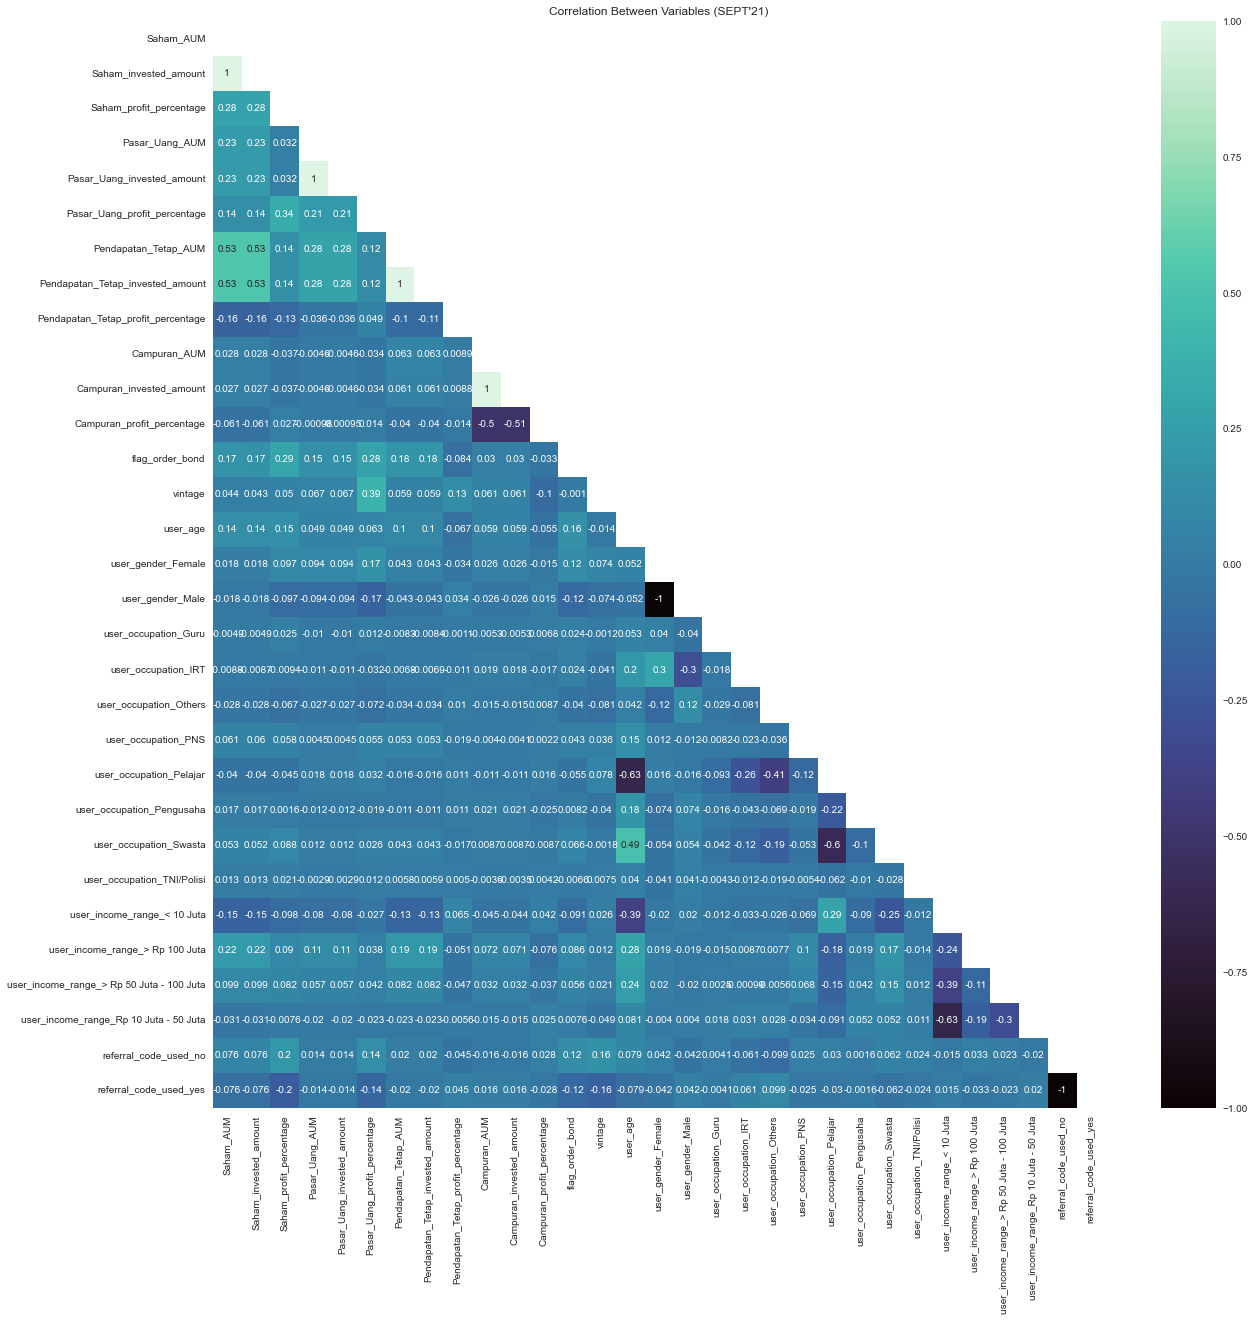

In [154]:
fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(1, 1, 1)
ax.set_title("Correlation Between Variables (SEPT'21)")

mask = np.triu(np.ones_like(
    df_cluster.corr(), dtype=np.bool))
sns.heatmap(df_cluster.corr(),vmin=-1,
            vmax=1,cmap='mako',annot=True,mask=mask,
            annot_kws={"fontsize":10})

plt.show()

At this point, we need to choose which variables we want to include to our model.

The rule is: choose variables that are low-correlated to other variables.

This means choose the threshold (e.g. if correlation < 0.7) and remove any variables that has any correlation greater than 0.7.

In [155]:
# Create correlation matrix
corr_matrix = df_cluster.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.7, and add into to_drop list
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
to_drop

C:\Users\Pandu\AppData\Local\Temp\ipykernel_4840\759309281.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


['Saham_invested_amount',
 'Pasar_Uang_invested_amount',
 'Pendapatan_Tetap_invested_amount',
 'Campuran_invested_amount',
 'user_gender_Male',
 'referral_code_used_yes']

In [156]:
to_keep = list(set(df_cluster.columns) - set(to_drop))
to_keep

['Pendapatan_Tetap_profit_percentage',
 'user_occupation_Pelajar',
 'user_income_range_> Rp 50 Juta - 100 Juta',
 'user_occupation_Pengusaha',
 'Saham_profit_percentage',
 'user_occupation_Guru',
 'referral_code_used_no',
 'user_income_range_> Rp 100 Juta',
 'Saham_AUM',
 'user_occupation_Others',
 'user_occupation_Swasta',
 'Pasar_Uang_profit_percentage',
 'user_occupation_TNI/Polisi',
 'user_occupation_PNS',
 'Campuran_profit_percentage',
 'user_gender_Female',
 'Pasar_Uang_AUM',
 'Campuran_AUM',
 'flag_order_bond',
 'vintage',
 'user_income_range_Rp 10 Juta - 50 Juta',
 'user_age',
 'Pendapatan_Tetap_AUM',
 'user_occupation_IRT',
 'user_income_range_< 10 Juta']

C:\Users\Pandu\AppData\Local\Temp\ipykernel_4840\3701054432.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_cluster[to_keep].corr(), dtype=np.bool))


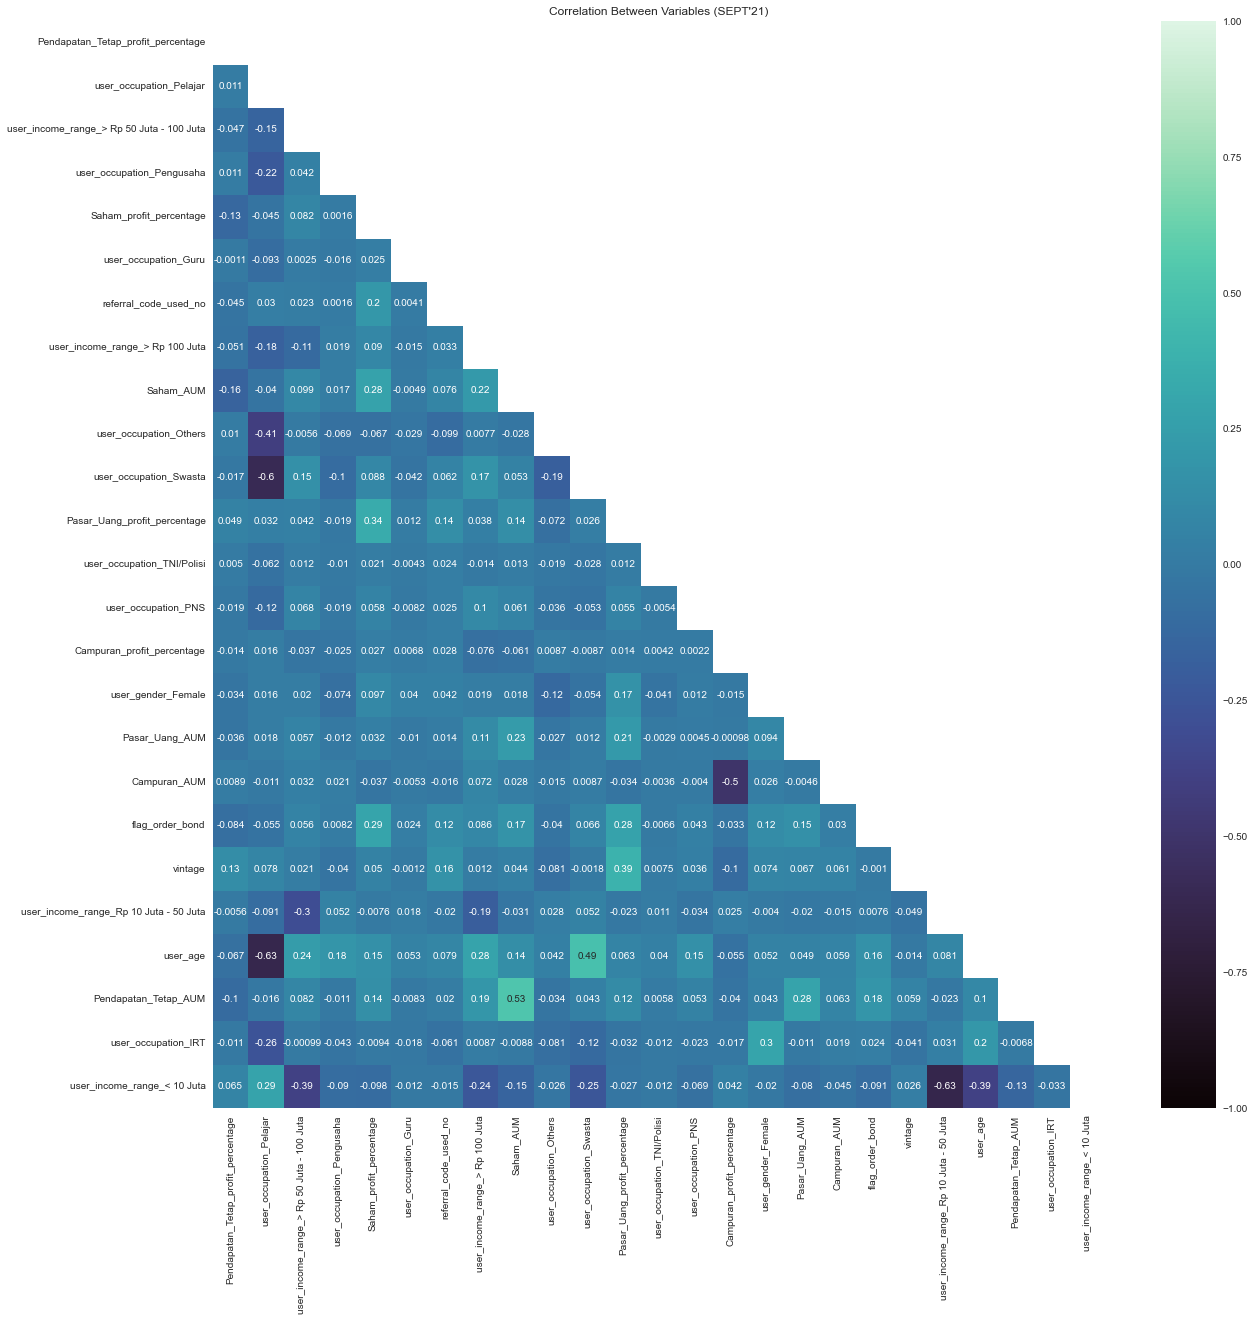

In [157]:
fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(1, 1, 1)
ax.set_title("Correlation Between Variables (SEPT'21)")

mask = np.triu(np.ones_like(
    df_cluster[to_keep].corr(), dtype=np.bool))
sns.heatmap(df_cluster[to_keep].corr(),vmin=-1,
            vmax=1,cmap='mako',annot=True,mask=mask,
            annot_kws={"fontsize":10})

plt.show()

In [158]:
# Just to make sure that flag_order_bond values are in integer type
df_cluster['flag_order_bond'] = df_cluster['flag_order_bond'].astype('int')
df_cluster

,Saham_AUM,Saham_invested_amount,Saham_profit_percentage,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_profit_percentage,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_profit_percentage,Campuran_AUM,...,user_occupation_Pelajar,user_occupation_Pengusaha,user_occupation_Swasta,user_occupation_TNI/Polisi,user_income_range_< 10 Juta,user_income_range_> Rp 100 Juta,user_income_range_> Rp 50 Juta - 100 Juta,user_income_range_Rp 10 Juta - 50 Juta,referral_code_used_no,referral_code_used_yes
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.042046,0.000000,0.000000,0.757476,0.203733,...,0,0,0,0,0,0,0,1,1,0
1,0.320301,0.317460,0.429035,0.096707,0.096685,0.162779,0.169199,0.168675,0.736995,0.000000,...,0,0,1,0,0,1,0,0,1,0
2,0.011357,0.011111,0.609751,0.001384,0.001381,0.420463,0.002432,0.002410,0.913435,0.000000,...,0,0,1,0,1,0,0,0,1,0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.042046,0.000000,0.000000,0.757476,0.000000,...,1,0,0,0,1,0,0,0,1,0
4,0.038693,0.038095,0.521784,0.004140,0.004144,0.004672,0.015692,0.015663,0.702004,0.000000,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7396,0.000000,0.000000,0.000000,0.000000,0.000000,0.042046,0.000000,0.000000,0.757476,0.000000,...,0,0,0,0,1,0,0,0,0,1
7397,0.000000,0.000000,0.000000,0.001380,0.001381,0.056062,0.000000,0.000000,0.757476,0.000000,...,1,0,0,0,1,0,0,0,0,1
7398,0.006460,0.006349,0.545448,0.001380,0.001381,0.056062,0.006031,0.006024,0.682501,0.000000,...,0,0,1,0,0,0,0,1,1,0
7399,0.000000,0.000000,0.000000,0.000000,0.000000,0.042046,0.001208,0.001205,0.720275,0.000000,...,0,0,1,0,0,0,0,1,0,1


# E. Logistic Regression
Using the result from the September 2021 bond campaign, to predict for october 2021.

The standard machine learning method:
- Split data between _training_ and _test_ part (usually 80% training, 20% test)
- Create model in _training_ data
- Validate the model performance on _test_ data

In [159]:
# df_clean_oct2 # <<<< this is the current october data just to remind

# Separate Churn from other variables
to_keep_vars = list(set(to_keep) - set(['flag_order_bond']))
to_keep_vars

['Pendapatan_Tetap_profit_percentage',
 'user_occupation_Pelajar',
 'user_income_range_> Rp 50 Juta - 100 Juta',
 'user_occupation_Pengusaha',
 'Saham_profit_percentage',
 'user_occupation_Guru',
 'referral_code_used_no',
 'user_income_range_> Rp 100 Juta',
 'user_occupation_Swasta',
 'user_occupation_Others',
 'Saham_AUM',
 'Pasar_Uang_profit_percentage',
 'user_occupation_TNI/Polisi',
 'user_occupation_PNS',
 'Campuran_profit_percentage',
 'user_gender_Female',
 'Pasar_Uang_AUM',
 'Campuran_AUM',
 'vintage',
 'user_income_range_Rp 10 Juta - 50 Juta',
 'user_age',
 'Pendapatan_Tetap_AUM',
 'user_occupation_IRT',
 'user_income_range_< 10 Juta']

In [160]:
from sklearn.model_selection import train_test_split

df_cluster
# Define the whole data
x = df_cluster[to_keep_vars]
y = df_cluster[['flag_order_bond']]

# Split into training and test dataset with 80/20 percent ratio
x_training, x_test, y_training, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [161]:
# Check split result
for df in [x_training, x_test, y_training, y_test]:
  print(df.shape)

(5920, 24)
(1481, 24)
(5920, 1)
(1481, 1)


In [162]:
# Check class balance in each datasets
for df in [y_training,y_test]:
  df2 = df.value_counts()
  print(df2)

flag_order_bond
0                  3600
1                  2320
dtype: int64
flag_order_bond
0                  888
1                  593
dtype: int64


In [163]:
# Fit logistic regression model to the training data
model = LogisticRegression(class_weight='balanced',max_iter=500)
model.fit(x_training, y_training)

c:\Users\Pandu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight='balanced', max_iter=500)

In [164]:
# Accuracy from prediction model with data training
model.score(x_training, y_training)

0.6712837837837838

# F. Confusion Matrix

In [165]:
# confusion_matrix(churn actual, churn prediction)
confusion_matrix(y_training, model.predict(x_training))

array([[2373, 1227],
       [ 719, 1601]], dtype=int64)

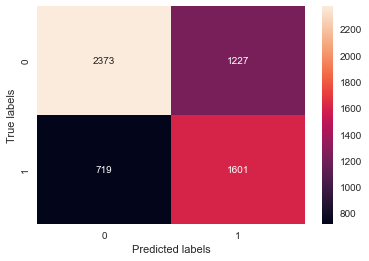

In [166]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_training, model.predict(x_training)), annot=True, fmt = 'd')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 

In [167]:
from sklearn.metrics import classification_report
print(classification_report(y_training, model.predict(x_training), target_names=['Not Churn','Churn']))

              precision    recall  f1-score   support

   Not Churn       0.77      0.66      0.71      3600
       Churn       0.57      0.69      0.62      2320

    accuracy                           0.67      5920
   macro avg       0.67      0.67      0.67      5920
weighted avg       0.69      0.67      0.68      5920



## Check model on the test data

In [168]:
model.score(x_test, y_test)

0.6961512491559757

In [169]:
confusion_matrix(y_test, model.predict(x_test))

array([[606, 282],
       [168, 425]], dtype=int64)

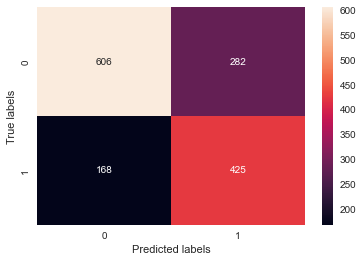

In [170]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, model.predict(x_test)), annot=True, fmt = 'd')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 

# G. Benefit-Cost Analysis

Suppose we want to get a campaign to top 30% of users with highest probability to buy govt bond, with goal to save marketing money to selected customers only.

We can first predict probability for all users, and get the top 30% users:

In [171]:
df_pred_oct = df_eop_sep.copy()
df_pred_oct = df_pred_oct.merge(df_bond_sep_users, how='inner', left_on='user_id', right_on='user_id')
df_pred_oct

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_profit_percentage,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_profit_percentage,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,...,Campuran_profit_percentage,user_gender,user_age,user_occupation,user_income_range,referral_code_used,vintage_sep,vintage_oct,flag_order_bond,bond_units_ordered
0,50701,2021-09-30,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,-0.56413,Female,28,IRT,Rp 10 Juta - 50 Juta,no,37,66,1,34
1,50961,2021-09-30,2063909.0,2000000.0,3.195450,700603.0,700000.0,0.086143,1398998.0,1400000.0,...,0.00000,Female,33,Swasta,> Rp 100 Juta,no,41,70,1,99
2,53759,2021-09-30,73179.0,70000.0,4.541429,10027.0,10000.0,0.270000,20109.0,20000.0,...,0.00000,Male,29,Swasta,< 10 Juta,no,42,71,0,0
3,61414,2021-09-30,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.00000,Male,26,Pelajar,< 10 Juta,no,53,82,0,0
4,66145,2021-09-30,249327.0,240000.0,3.886250,29992.0,30000.0,-0.026667,129748.0,130000.0,...,0.00000,Female,33,Swasta,> Rp 100 Juta,no,28,57,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7396,4165020,2021-09-30,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.00000,Male,24,Others,< 10 Juta,yes,2,31,0,0
7397,4165132,2021-09-30,0.0,0.0,0.000000,10001.0,10000.0,0.010000,0.0,0.0,...,0.00000,Male,18,Pelajar,< 10 Juta,yes,2,31,0,0
7398,4165630,2021-09-30,41625.0,40000.0,4.062500,10001.0,10000.0,0.010000,49869.0,50000.0,...,0.00000,Female,28,Swasta,Rp 10 Juta - 50 Juta,no,2,31,1,55
7399,4165704,2021-09-30,0.0,0.0,0.000000,0.0,0.0,0.000000,9987.0,10000.0,...,0.00000,Male,25,Swasta,Rp 10 Juta - 50 Juta,yes,2,31,0,0


In [172]:
# Delete columns thats not gonna be used (user id, date, vintage_sep)
df_use_pred = df_pred_oct.drop(['user_id', 'date', 'vintage_sep'], axis=1)

# Replace columns name from 'vintage_30sept' to 'vintage' only
df_use_pred.rename(columns={'vintage_oct': 'vintage'}, inplace=True)
df_use_pred.columns

Index(['Saham_AUM', 'Saham_invested_amount', 'Saham_profit_percentage',
       'Pasar_Uang_AUM', 'Pasar_Uang_invested_amount',
       'Pasar_Uang_profit_percentage', 'Pendapatan_Tetap_AUM',
       'Pendapatan_Tetap_invested_amount',
       'Pendapatan_Tetap_profit_percentage', 'Campuran_AUM',
       'Campuran_invested_amount', 'Campuran_profit_percentage', 'user_gender',
       'user_age', 'user_occupation', 'user_income_range',
       'referral_code_used', 'vintage', 'flag_order_bond',
       'bond_units_ordered'],
      dtype='object')

Selecting the data

In [173]:
numerical = ['Saham_AUM', 'Saham_invested_amount', 'Saham_profit_percentage',
       'Pasar_Uang_AUM', 'Pasar_Uang_invested_amount',
       'Pasar_Uang_profit_percentage', 'Pendapatan_Tetap_AUM',
       'Pendapatan_Tetap_invested_amount',
       'Pendapatan_Tetap_profit_percentage', 'Campuran_AUM',
       'Campuran_invested_amount', 'Campuran_profit_percentage',
       'vintage', 'user_age'
    ]

categorical = ['user_gender', 'user_occupation', 'user_income_range',
        'referral_code_used'
    ]

all_cols = numerical + categorical

df_use_pred = df_use_pred[all_cols]
df_use_pred

,Saham_AUM,Saham_invested_amount,Saham_profit_percentage,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_profit_percentage,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_profit_percentage,Campuran_AUM,Campuran_invested_amount,Campuran_profit_percentage,vintage,user_age,user_gender,user_occupation,user_income_range,referral_code_used
0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,9943587.0,10000000.0,-0.56413,66,28,Female,IRT,Rp 10 Juta - 50 Juta,no
1,2063909.0,2000000.0,3.195450,700603.0,700000.0,0.086143,1398998.0,1400000.0,-0.071571,0.0,0.0,0.00000,70,33,Female,Swasta,> Rp 100 Juta,no
2,73179.0,70000.0,4.541429,10027.0,10000.0,0.270000,20109.0,20000.0,0.545000,0.0,0.0,0.00000,71,29,Male,Swasta,< 10 Juta,no
3,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,82,26,Male,Pelajar,< 10 Juta,no
4,249327.0,240000.0,3.886250,29992.0,30000.0,-0.026667,129748.0,130000.0,-0.193846,0.0,0.0,0.00000,57,33,Female,Swasta,> Rp 100 Juta,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7396,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,31,24,Male,Others,< 10 Juta,yes
7397,0.0,0.0,0.000000,10001.0,10000.0,0.010000,0.0,0.0,0.000000,0.0,0.0,0.00000,31,18,Male,Pelajar,< 10 Juta,yes
7398,41625.0,40000.0,4.062500,10001.0,10000.0,0.010000,49869.0,50000.0,-0.262000,0.0,0.0,0.00000,31,28,Female,Swasta,Rp 10 Juta - 50 Juta,no
7399,0.0,0.0,0.000000,0.0,0.0,0.000000,9987.0,10000.0,-0.130000,0.0,0.0,0.00000,31,25,Male,Swasta,Rp 10 Juta - 50 Juta,yes


In [174]:
# Normalize numerical data using minmax scaler
scaler = MinMaxScaler()
df_use_pred[numerical] = scaler.fit_transform(df_use_pred[numerical])

# Create dummy for categorical data
df_use_pred = pd.get_dummies(df_use_pred, columns=categorical)

df_use_pred

,Saham_AUM,Saham_invested_amount,Saham_profit_percentage,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_profit_percentage,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_profit_percentage,Campuran_AUM,...,user_occupation_Pelajar,user_occupation_Pengusaha,user_occupation_Swasta,user_occupation_TNI/Polisi,user_income_range_< 10 Juta,user_income_range_> Rp 100 Juta,user_income_range_> Rp 50 Juta - 100 Juta,user_income_range_Rp 10 Juta - 50 Juta,referral_code_used_no,referral_code_used_yes
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.042046,0.000000,0.000000,0.757476,0.203733,...,0,0,0,0,0,0,0,1,1,0
1,0.320301,0.317460,0.429035,0.096707,0.096685,0.162779,0.169199,0.168675,0.736995,0.000000,...,0,0,1,0,0,1,0,0,1,0
2,0.011357,0.011111,0.609751,0.001384,0.001381,0.420463,0.002432,0.002410,0.913435,0.000000,...,0,0,1,0,1,0,0,0,1,0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.042046,0.000000,0.000000,0.757476,0.000000,...,1,0,0,0,1,0,0,0,1,0
4,0.038693,0.038095,0.521784,0.004140,0.004144,0.004672,0.015692,0.015663,0.702004,0.000000,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7396,0.000000,0.000000,0.000000,0.000000,0.000000,0.042046,0.000000,0.000000,0.757476,0.000000,...,0,0,0,0,1,0,0,0,0,1
7397,0.000000,0.000000,0.000000,0.001380,0.001381,0.056062,0.000000,0.000000,0.757476,0.000000,...,1,0,0,0,1,0,0,0,0,1
7398,0.006460,0.006349,0.545448,0.001380,0.001381,0.056062,0.006031,0.006024,0.682501,0.000000,...,0,0,1,0,0,0,0,1,1,0
7399,0.000000,0.000000,0.000000,0.000000,0.000000,0.042046,0.001208,0.001205,0.720275,0.000000,...,0,0,1,0,0,0,0,1,0,1


In [175]:
# Below is data from October that needs to be predicted
x2 = df_use_pred[to_keep_vars]
x2

,Pendapatan_Tetap_profit_percentage,user_occupation_Pelajar,user_income_range_> Rp 50 Juta - 100 Juta,user_occupation_Pengusaha,Saham_profit_percentage,user_occupation_Guru,referral_code_used_no,user_income_range_> Rp 100 Juta,user_occupation_Swasta,user_occupation_Others,...,Campuran_profit_percentage,user_gender_Female,Pasar_Uang_AUM,Campuran_AUM,vintage,user_income_range_Rp 10 Juta - 50 Juta,user_age,Pendapatan_Tetap_AUM,user_occupation_IRT,user_income_range_< 10 Juta
0,0.757476,0,0,0,0.000000,0,1,0,0,0,...,0.715981,1,0.000000,0.203733,0.603448,1,0.379310,0.000000,1,0
1,0.736995,0,0,0,0.429035,0,1,1,1,0,...,0.776226,1,0.096707,0.000000,0.672414,0,0.551724,0.169199,0,0
2,0.913435,0,0,0,0.609751,0,1,0,1,0,...,0.776226,0,0.001384,0.000000,0.689655,0,0.413793,0.002432,0,1
3,0.757476,1,0,0,0.000000,0,1,0,0,0,...,0.776226,0,0.000000,0.000000,0.879310,0,0.310345,0.000000,0,1
4,0.702004,0,0,0,0.521784,0,1,1,1,0,...,0.776226,1,0.004140,0.000000,0.448276,0,0.551724,0.015692,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7396,0.757476,0,0,0,0.000000,0,0,0,0,1,...,0.776226,0,0.000000,0.000000,0.000000,0,0.241379,0.000000,0,1
7397,0.757476,1,0,0,0.000000,0,0,0,0,0,...,0.776226,0,0.001380,0.000000,0.000000,0,0.034483,0.000000,0,1
7398,0.682501,0,0,0,0.545448,0,1,0,1,0,...,0.776226,1,0.001380,0.000000,0.000000,1,0.379310,0.006031,0,0
7399,0.720275,0,0,0,0.000000,0,0,0,1,0,...,0.776226,0,0.000000,0.000000,0.000000,1,0.275862,0.001208,0,0


In [176]:
# This is data from September 2021 government bond order
y

,flag_order_bond
0,1
1,1
2,0
3,0
4,0
...,...
7396,0
7397,0
7398,1
7399,0


In [177]:
predicted_prob = model.predict_proba(x2)
predicted_prob = pd.DataFrame(predicted_prob[:,1], columns = ['predicted_score'])
predicted_prob

,predicted_score
0,0.385080
1,0.760641
2,0.680198
3,0.206554
4,0.594901
...,...
7396,0.290163
7397,0.271467
7398,0.698226
7399,0.314705


In [178]:
df_pred_oct['predicted_score'] = predicted_prob['predicted_score']
final_prediction = df_pred_oct[['user_id', 'predicted_score']]
final_prediction

,user_id,predicted_score
0,50701,0.385080
1,50961,0.760641
2,53759,0.680198
3,61414,0.206554
4,66145,0.594901
...,...,...
7396,4165020,0.290163
7397,4165132,0.271467
7398,4165630,0.698226
7399,4165704,0.314705


In [179]:
# Get the top 30%
pct30_threshold = final_prediction['predicted_score'].quantile(0.7)

# Get top 30% customers
pct30_customer = final_prediction[final_prediction['predicted_score'] > pct30_threshold]

# Merge with actual churn outcome 
pct30_customer = pct30_customer.merge(y, left_index = True, right_index = True)

# SAVE TO EXCEL
pct30_customer.to_excel('Top30percentCustomersToBuyGov.xlsx')

pct30_customer

,user_id,predicted_score,flag_order_bond
1,50961,0.760641,1
2,53759,0.680198,0
5,67251,0.693764,1
6,70568,0.711618,0
9,77578,0.762704,1
...,...,...,...
7357,4159667,0.865106,0
7360,4160074,0.633212,1
7370,4160917,0.622869,1
7384,4163030,0.634060,0


In [180]:
pct30_customer['flag_order_bond'].value_counts()

1    1344
0     876
Name: flag_order_bond, dtype: int64

## Benefit-cost analysis Result

In [181]:
total = len(final_prediction)
print('total client:',total)

#jumlah client
total = 1342 + 878
print('Top 30% are:',total)
print('Total prediction buying:',1342)
print('Total prediction not buying:',878)

#average prob for buying bond
ave=1342/total
print('Average probability for buying bond: ', ave)
print('Average probability for buying bond in percent: ', round(ave*100, 2))

# Convert Identifier type to object
df_bond_sept['user_id'] = df_bond_sept['user_id'].astype(str)

# Assumption for average bond unit being bought
merge = pct30_customer.merge(df_bond_sept,how='inner',left_on='user_id', right_on='user_id')
merge['bond_units_ordered_nan'] = merge['bond_units_ordered'].replace(0, np.NaN, regex=True)
bond_buy_assumption = merge['bond_units_ordered_nan'].mean()
print('Assumption for average bond unit being bought: ',bond_buy_assumption)

total client: 7401
Top 30% are: 2220
Total prediction buying: 1342
Total prediction not buying: 878
Average probability for buying bond:  0.6045045045045045
Average probability for buying bond in percent:  60.45
Assumption for average bond unit being bought:  45.58184523809524
